# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ananta Alfallah Tarigan
- Email: anantar437471@gmail.com
- Id Dicoding: ananta_alfallah

# Latar Belakang

Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

Nah, sebagai calon data scientist masa depan Anda diminta untuk membantu Jaya Jaya Institut dalam menyelesaikan permasalahannya. Mereka telah menyediakan dataset yang dapat Anda unduh melalui tautan berikut: students' performance. Selain itu, mereka juga meminta Anda untuk membuatkan dashboard agar mereka mudah dalam memahami data dan memonitor performa siswa.

Hal yang akan dilakukan:
1. Mempersiapkan dataset (Gather, Asses, Clean)
2. Melakukan Exploratory Data Analysis (EDA) dan visualisasi, untuk menemukan insight dari data
3. Melakukan data preparation, training model, dan evaluation

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df = pd.read_csv("data.csv", sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Terlihat bahwa semua kolom kategori kecuali Status, memiliki nilai integer sehingga hal ini menyulitkan dalam mengetahui apa nama kategori tersebut.

Terdapat kesalahan penamaan kolom "Nacionality"

In [3]:
df = df.rename(columns={'Nacionality': 'Nationality'})

In [5]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nationality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [8]:
df.nunique()

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nationality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

### Mengubah kolom kategori yang berisi angka menjadi text

In [4]:
target_dict = {1:'single',
               2:'married',
               3:'widower',
               4:'divorced',
               5:'facto union',
               6:'legally separated',}

df["Marital_status"] = df["Marital_status"].map(target_dict)

In [5]:
target_dict = {1:'1st phase - general contingent 2 - Ordinance No. 612/93',
               2:'1st phase - special contingent (Azores Island)',
               5:'widower',
               7:'Holders of other higher courses',
               10:'Ordinance No. 854-B/99 15 - International student (bachelor)',
               15:'International student (bachelor)',
               16:'1st phase - special contingent (Madeira Island)',
               17:'2nd phase - general contingent',
               18:'3rd phase - general contingent',
               26:'Ordinance No. 533-A/99, item b2) (Different Plan)',
               27:'Ordinance No. 533-A/99, item b3 (Other Institution)',
               39:'Over 23 years old 42',
               42:'Transfer 43',
               43:'Change of course',
               44:'Technological specialization diploma holders',
               51:'Change of institution/course',
               53:'Short cycle diploma holders',
               57:'Change of institution/course (International)'}

df["Application_mode"] = df["Application_mode"].map(target_dict)

In [6]:
target_dict = {33:'Biofuel Production Technologies',
               171:'Animation and Multimedia Design 8014',
               8014:'Social Service (evening attendance)',
               9003:'Agronomy',
               9070:'Communication Design',
               9085:'Veterinary Nursing',
               9119:'Informatics Engineering',
               9130:'Equinculture',
               9147:'Management',
               9238:'Social Service',
               9254:'Tourism',
               9500:'Nursing',
               9556:'Oral Hygiene',
               9670:'Advertising and Marketing Management',
               9773:'Journalism and Communication',
               9853:'Basic Education',
               9991:'Management (evening attendance)'}

df["Course"] = df["Course"].map(target_dict)

In [7]:
target_dict = {1:'daytime',
               0:'evening'}

df["Daytime_evening_attendance"] = df["Daytime_evening_attendance"].map(target_dict)

In [8]:
target_dict = {1:'Secondary education',
               2:'Higher education - bachelor\'s degree',
               3:'Higher education - degree',
               4:'Higher education - master\'s',
               5:'Higher education - doctorate',
               6:'Frequency of higher education',
               9:'12th year of schooling - not completed',
               10:'11th year of schooling - not completed',
               12:'Other - 11th year of schooling 14 - 10th year of schooling',
               14:'10th year of schooling',
               15:'10th year of schooling - not completed',
               19:'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
               38:'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
               39:'Technological specialization course',
               40:'Higher education - degree (1st cycle)',
               42:'Professional higher technical course',
               43:'Higher education - master (2nd cycle)'}

df["Previous_qualification"] = df["Previous_qualification"].map(target_dict)

In [9]:
target_dict = {1:'Portuguese',
               2:'German',
               6:'Spanish',
               11:'Italian',
               13:'Dutch',
               14:'English',
               17:'Lithuanian',
               21:'Angolan',
               22:'Cape Verdean',
               24:'Guinean',
               25:'Mozambican',
               26:'Santomean',
               32:'Turkish',
               41:'Brazilian',
               62:'Romanian',
               100:'Moldova (Republic of)',
               101:'Mexican',
               103:'Ukrainian',
               105:'Russian',
               108:'Cuban',
               109:'Colombian'}

df["Nationality"] = df["Nationality"].map(target_dict)

In [10]:
def numerik_to_kategorik (df, kategori, coloumn):
    target_dict = {}
    i=0
    for num in df[coloumn].sort_values().drop_duplicates().values:
        target_dict[num] = kategori[0+i]
        i=i+1
    df[coloumn] = df[coloumn].map(target_dict)
    return df

In [11]:
kategori_label = ['Secondary Education - 12th Year of Schooling or Eq.',
                  'Higher Education - Bachelor\'s Degree',
                  'Higher Education - Degree', 
                  'Higher Education - Master\'s', 
                  'Higher Education - Doctorate',
                  "Frequency of Higher Education",
                  "12th Year of Schooling",
                  "11th Year of Schooling - Not Completed", 
                  "7th Year (Old)", 
                  "Other - 11th Year of Schooling", 
                  "10th Year of Schooling", 
                  "General commerce course", 
                  "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.", 
                  "Technical-professional course", 
                  "7th year of schooling", 
                  "2nd cycle of the general high school course", 
                  "9th Year of Schooling - Not Completed", 
                  "8th year of schooling", 
                  "Unknown", 
                  "Can't read or write", 
                  "Can read without having a 4th year of schooling", 
                  "Basic education 1st cycle (4th/5th year) or equiv.", 
                  "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.", 
                  "Technological specialization course", 
                  "Higher education - degree (1st cycle)", 
                  "Specialized higher studies course", 
                  "Professional higher technical course", 
                  "Higher Education - Master (2nd cycle)", 
                  "Higher Education - Doctorate (3rd cycle)" 
                   ]

numerik_to_kategorik(df=df, kategori=kategori_label, coloumn="Mothers_qualification")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design 8014,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent 2 - Ordinance N...,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old 42,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent 2 - Ordinance N...,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent 2 - Ordinance N...,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent 2 - Ordinance N...,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent 2 - Ordinance N...,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [12]:
kategori_label = ['Secondary Education - 12th Year of Schooling or Eq.',
                  'Higher Education - Bachelor\'s Degree',
                  'Higher Education - Degree', 
                  'Higher Education - Master\'s', 
                  'Higher Education - Doctorate',
                  "Frequency of Higher Education",
                  "12th Year of Schooling - Not Completed",
                  "11th Year of Schooling - Not Completed", 
                  "7th Year (Old)", 
                  "Other - 11th Year of Schooling",
                  "2nd year complementary high school course",
                  "10th Year of Schooling", 
                  "General commerce course", 
                  "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
                  "Complementary High School Course", 
                  "Technical-professional course", 
                  "Complementary High School Course - not concluded",
                  "7th year of schooling", 
                  "2nd cycle of the general high school course", 
                  "9th Year of Schooling - Not Completed", 
                  "8th year of schooling",
                  "General Course of Administration and Commerce",
                  "Supplementary Accounting and Administration",
                  "Unknown", 
                  "Can't read or write", 
                  "Can read without having a 4th year of schooling", 
                  "Basic education 1st cycle (4th/5th year) or equiv.", 
                  "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.", 
                  "Technological specialization course", 
                  "Higher education - degree (1st cycle)", 
                  "Specialized higher studies course", 
                  "Professional higher technical course", 
                  "Higher Education - Master (2nd cycle)", 
                  "Higher Education - Doctorate (3rd cycle)" 
                   ]

numerik_to_kategorik(df=df, kategori=kategori_label, coloumn="Fathers_qualification")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design 8014,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent 2 - Ordinance N...,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old 42,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent 2 - Ordinance N...,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent 2 - Ordinance N...,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent 2 - Ordinance N...,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent 2 - Ordinance N...,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [14]:
kategori_label = ['Student',
                  'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
                  'Specialists in Intellectual and Scientific Activities', 
                  "Intermediate Level Technicians and Professions",
                  "Administrative staff", 
                  "Personal Services, Security and Safety Workers and Sellers", 
                  "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
                  "Skilled Workers in Industry, Construction and Craftsmen",
                  "Installation and Machine Operators and Assembly Workers", 
                  "Unskilled Workers", 
                  "Armed Forces Professions",
                  "Other Situation", 
                  "(blank)", 
                  "Health professionals",
                  "teachers", 
                  "Specialists in information and communication technologies (ICT)", 
                  "Intermediate level science and engineering technicians and professions", 
                  "Technicians and professionals, of intermediate level of health",
                  "Intermediate level technicians from legal, social, sports, cultural and similar services",
                  "Office workers, secretaries in general and data processing operators",
                  "Data, accounting, statistical, financial services and registry-related operators", 
                  "Other administrative support staff", 
                  "personal service workers", 
                  "sellers", 
                  "Personal care workers and the like", 
                  "Skilled construction workers and the like, except electricians", 
                  "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like", 
                  "Workers in food processing, woodworking, clothing and other industries and crafts", 
                  "cleaning workers", 
                  "Unskilled workers in agriculture, animal production, fisheries and forestry", 
                  "Unskilled workers in extractive industry, construction, manufacturing and transport",
                  "Meal preparation assistants"
                   ]

numerik_to_kategorik(df=df, kategori=kategori_label, coloumn="Mothers_occupation")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design 8014,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,teachers,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,"Skilled Workers in Industry, Construction and ...",3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent 2 - Ordinance N...,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Personal care workers and the like,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,teachers,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old 42,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Personal care workers and the like,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent 2 - Ordinance N...,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,teachers,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent 2 - Ordinance N...,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Personal care workers and the like,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent 2 - Ordinance N...,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Personal care workers and the like,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent 2 - Ordinance N...,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,"Technicians and professionals, of intermediate...",4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Grad

In [15]:
kategori_label = ['Student',
                  'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
                  'Specialists in Intellectual and Scientific Activities', 
                  "Intermediate Level Technicians and Professions",
                  "Administrative staff", 
                  "Personal Services, Security and Safety Workers and Sellers", 
                  "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
                  "Skilled Workers in Industry, Construction and Craftsmen",
                  "Installation and Machine Operators and Assembly Workers", 
                  "Unskilled Workers", 
                  "Armed Forces Professions",
                  "Other Situation", 
                  "(blank)",
                  "Armed Forces Officers",
                  "Armed Forces Sergeants",
                  "Other Armed Forces personnel",
                  "Directors of administrative and commercial services",
                  "Hotel, catering, trade and other services directors",
                  "Specialists in the physical sciences, mathematics, engineering and related techniques", 
                  "Health professionals",
                  "teachers", 
                  "Specialists in finance, accounting, administrative organization, public and commercial relations", 
                  "Intermediate level science and engineering technicians and professions", 
                  "Technicians and professionals, of intermediate level of health",
                  "Intermediate level technicians from legal, social, sports, cultural and similar services",
                  "Information and communication technology technicians",
                  "Office workers, secretaries in general and data processing operators",
                  "Data, accounting, statistical, financial services and registry-related operators", 
                  "Other administrative support staff", 
                  "personal service workers", 
                  "sellers", 
                  "Personal care workers and the like",
                  "Protection and security services personnel",
                  "Market-oriented farmers and skilled agricultural and animal production workers",
                  "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence", 
                  "Skilled construction workers and the like, except electricians",
                  "Skilled workers in metallurgy, metalworking and similar",
                  "Skilled workers in electricity and electronics",
                  "Workers in food processing, woodworking, clothing and other industries and crafts",
                  "Fixed plant and machine operators",
                  "assembly workers",
                  "Vehicle drivers and mobile equipment operators",
                  "Unskilled workers in agriculture, animal production, fisheries and forestry",
                  "Unskilled workers in extractive industry, construction, manufacturing and transport",
                  "Meal preparation assistants",
                  "Street vendors (except food) and street service providers"
                   ]

numerik_to_kategorik(df=df, kategori=kategori_label, coloumn="Fathers_occupation")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design 8014,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,teachers,Unskilled Workers,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,"Skilled Workers in Industry, Construction and ...",Intermediate Level Technicians and Professions,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent 2 - Ordinance N...,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Personal care workers and the like,Unskilled Workers,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,teachers,Intermediate Level Technicians and Professions,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old 42,1,Social Service (evening attendance),evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Personal care workers and the like,Unskilled Workers,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent 2 - Ordinance N...,6,Journalism and Communication,daytime,Secondary education,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,teachers,Administrative staff,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st phase - general contingent 2 - Ordinance N...,2,Journalism and Communication,daytime,Secondary education,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Personal care workers and the like,Unskilled Workers,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st phase - general contingent 2 - Ordinance N...,1,Nursing,daytime,Secondary education,154.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Personal care workers and the like,Unskilled Workers,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st phase - general contingent 2 - Ordinance N...,1,Management,daytime,Secondary education,180.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq.

In [16]:
target_dict = {1:'yes',
               0:'no'}

df["Displaced"] = df["Displaced"].map(target_dict)
df["Educational_special_needs"] = df["Educational_special_needs"].map(target_dict)
df["Debtor"] = df["Debtor"].map(target_dict)
df["Tuition_fees_up_to_date"] = df["Tuition_fees_up_to_date"].map(target_dict)
df["Scholarship_holder"] = df["Scholarship_holder"].map(target_dict)
df["International"] = df["International"].map(target_dict)

In [17]:
target_dict = {1:'male',
               0:'female'}

df["Gender"] = df["Gender"].map(target_dict)

In [18]:
df.head(3)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design 8014,daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,teachers,Unskilled Workers,127.3,yes,no,no,yes,male,no,20,no,0,0,0,0,0.0,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,"Skilled Workers in Industry, Construction and ...",Intermediate Level Technicians and Professions,142.5,yes,no,no,no,male,no,19,no,0,6,6,6,14.0,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent 2 - Ordinance N...,5,Communication Design,daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Personal care workers and the like,Unskilled Workers,124.8,yes,no,no,no,male,no,19,no,0,6,0,0,0.0,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


In [23]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424,4424,4424.000000,4424,4424,4424,4424.000000,4424,4424,4424,4424,4424,4424.000000,4424,4424,4424,4424,4424,4424,4424.000000,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6,18,NaN,17,2,17,NaN,21,29,34,32,46,NaN,2,2,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,single,1st phase - general contingent 2 - Ordinance N...,NaN,Nursing,daytime,Secondary education,NaN,Portuguese,Secondary Education - 12th Year of Schooling o...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,NaN,yes,no,no,yes,female,no,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919,1708,NaN,766,3941,3717,NaN,4314,1069,1209,1577,1010,NaN,2426,4373,3921,3896,2868,3325,NaN,4314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,1.727848,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,NaN,NaN,126.978119,NaN,NaN,NaN,NaN,NaN,NaN,23.265145,NaN,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,1.313793,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,NaN,NaN,14.482001,NaN,NaN,NaN,NaN,NaN,NaN,7.587816,NaN,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,NaN,NaN,117.900000,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,NaN,NaN,126.100000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,NaN,NaN,134.800000,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [19]:
Categorical_columns = ["Marital_status","Application_mode",
                       "Course","Daytime_evening_attendance","Previous_qualification",
                       "Nationality", "Mothers_qualification", "Fathers_qualification",
                       "Mothers_occupation", "Fathers_occupation", "Displaced", "Educational_special_needs",
                       "Debtor", "Tuition_fees_up_to_date", "Gender", "Scholarship_holder",
                       "International"]

numerical_columns = ["Application_order", "Previous_qualification_grade", 
                     "Admission_grade", "Age_at_enrollment", 
                     "Curricular_units_1st_sem_credited", 
                     "Curricular_units_1st_sem_enrolled", 
                     "Curricular_units_1st_sem_evaluations", 
                     "Curricular_units_1st_sem_approved", 
                     "Curricular_units_1st_sem_grade", 
                     "Curricular_units_1st_sem_without_evaluations", 
                     "Curricular_units_2nd_sem_credited", 
                     "Curricular_units_2nd_sem_enrolled", 
                     "Curricular_units_2nd_sem_evaluations", 
                     "Curricular_units_2nd_sem_approved", 
                     "Curricular_units_2nd_sem_grade", 
                     "Curricular_units_2nd_sem_without_evaluations",
                     "Unemployment_rate", "Inflation_rate", "GDP"]

Label_column = "Status"

In [25]:
df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Mahasiswa dengan status enrolled, tidak memberi informasi karena kita masih belum mengetahui apakah mahasiswa tersebut grad/dropout, sehingga status ini dihilangkan

In [20]:
df = df.drop(df[df['Status'] == 'Enrolled'].index)
grad_dropout_total = df['Status'].value_counts()

## EDA

(-1.0999988388360862,
 1.0999931996711918,
 -1.099998558382754,
 1.0999999313515598)

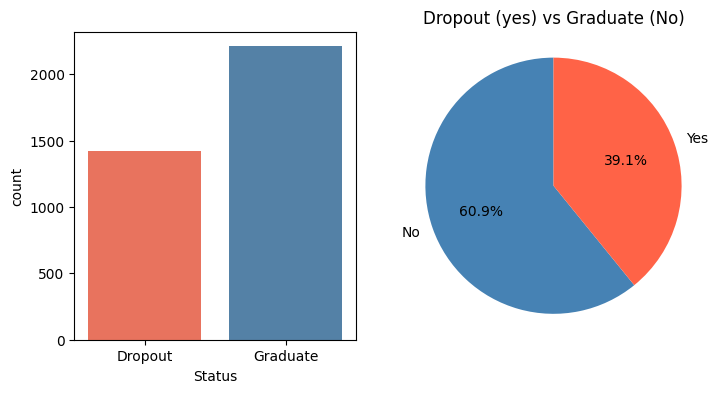

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
dropout_colors = {'Graduate': 'steelblue', 'Dropout': 'tomato'}

sns.countplot(data=df,x='Status', hue='Status', ax=ax[0], palette=dropout_colors)

ax[1].pie(grad_dropout_total, labels=["No","Yes"], autopct='%1.1f%%', startangle=90, colors=[dropout_colors['Graduate'], dropout_colors['Dropout']])
ax[1].set_title("Dropout (yes) vs Graduate (No)", loc="center")
ax[1].axis('equal')

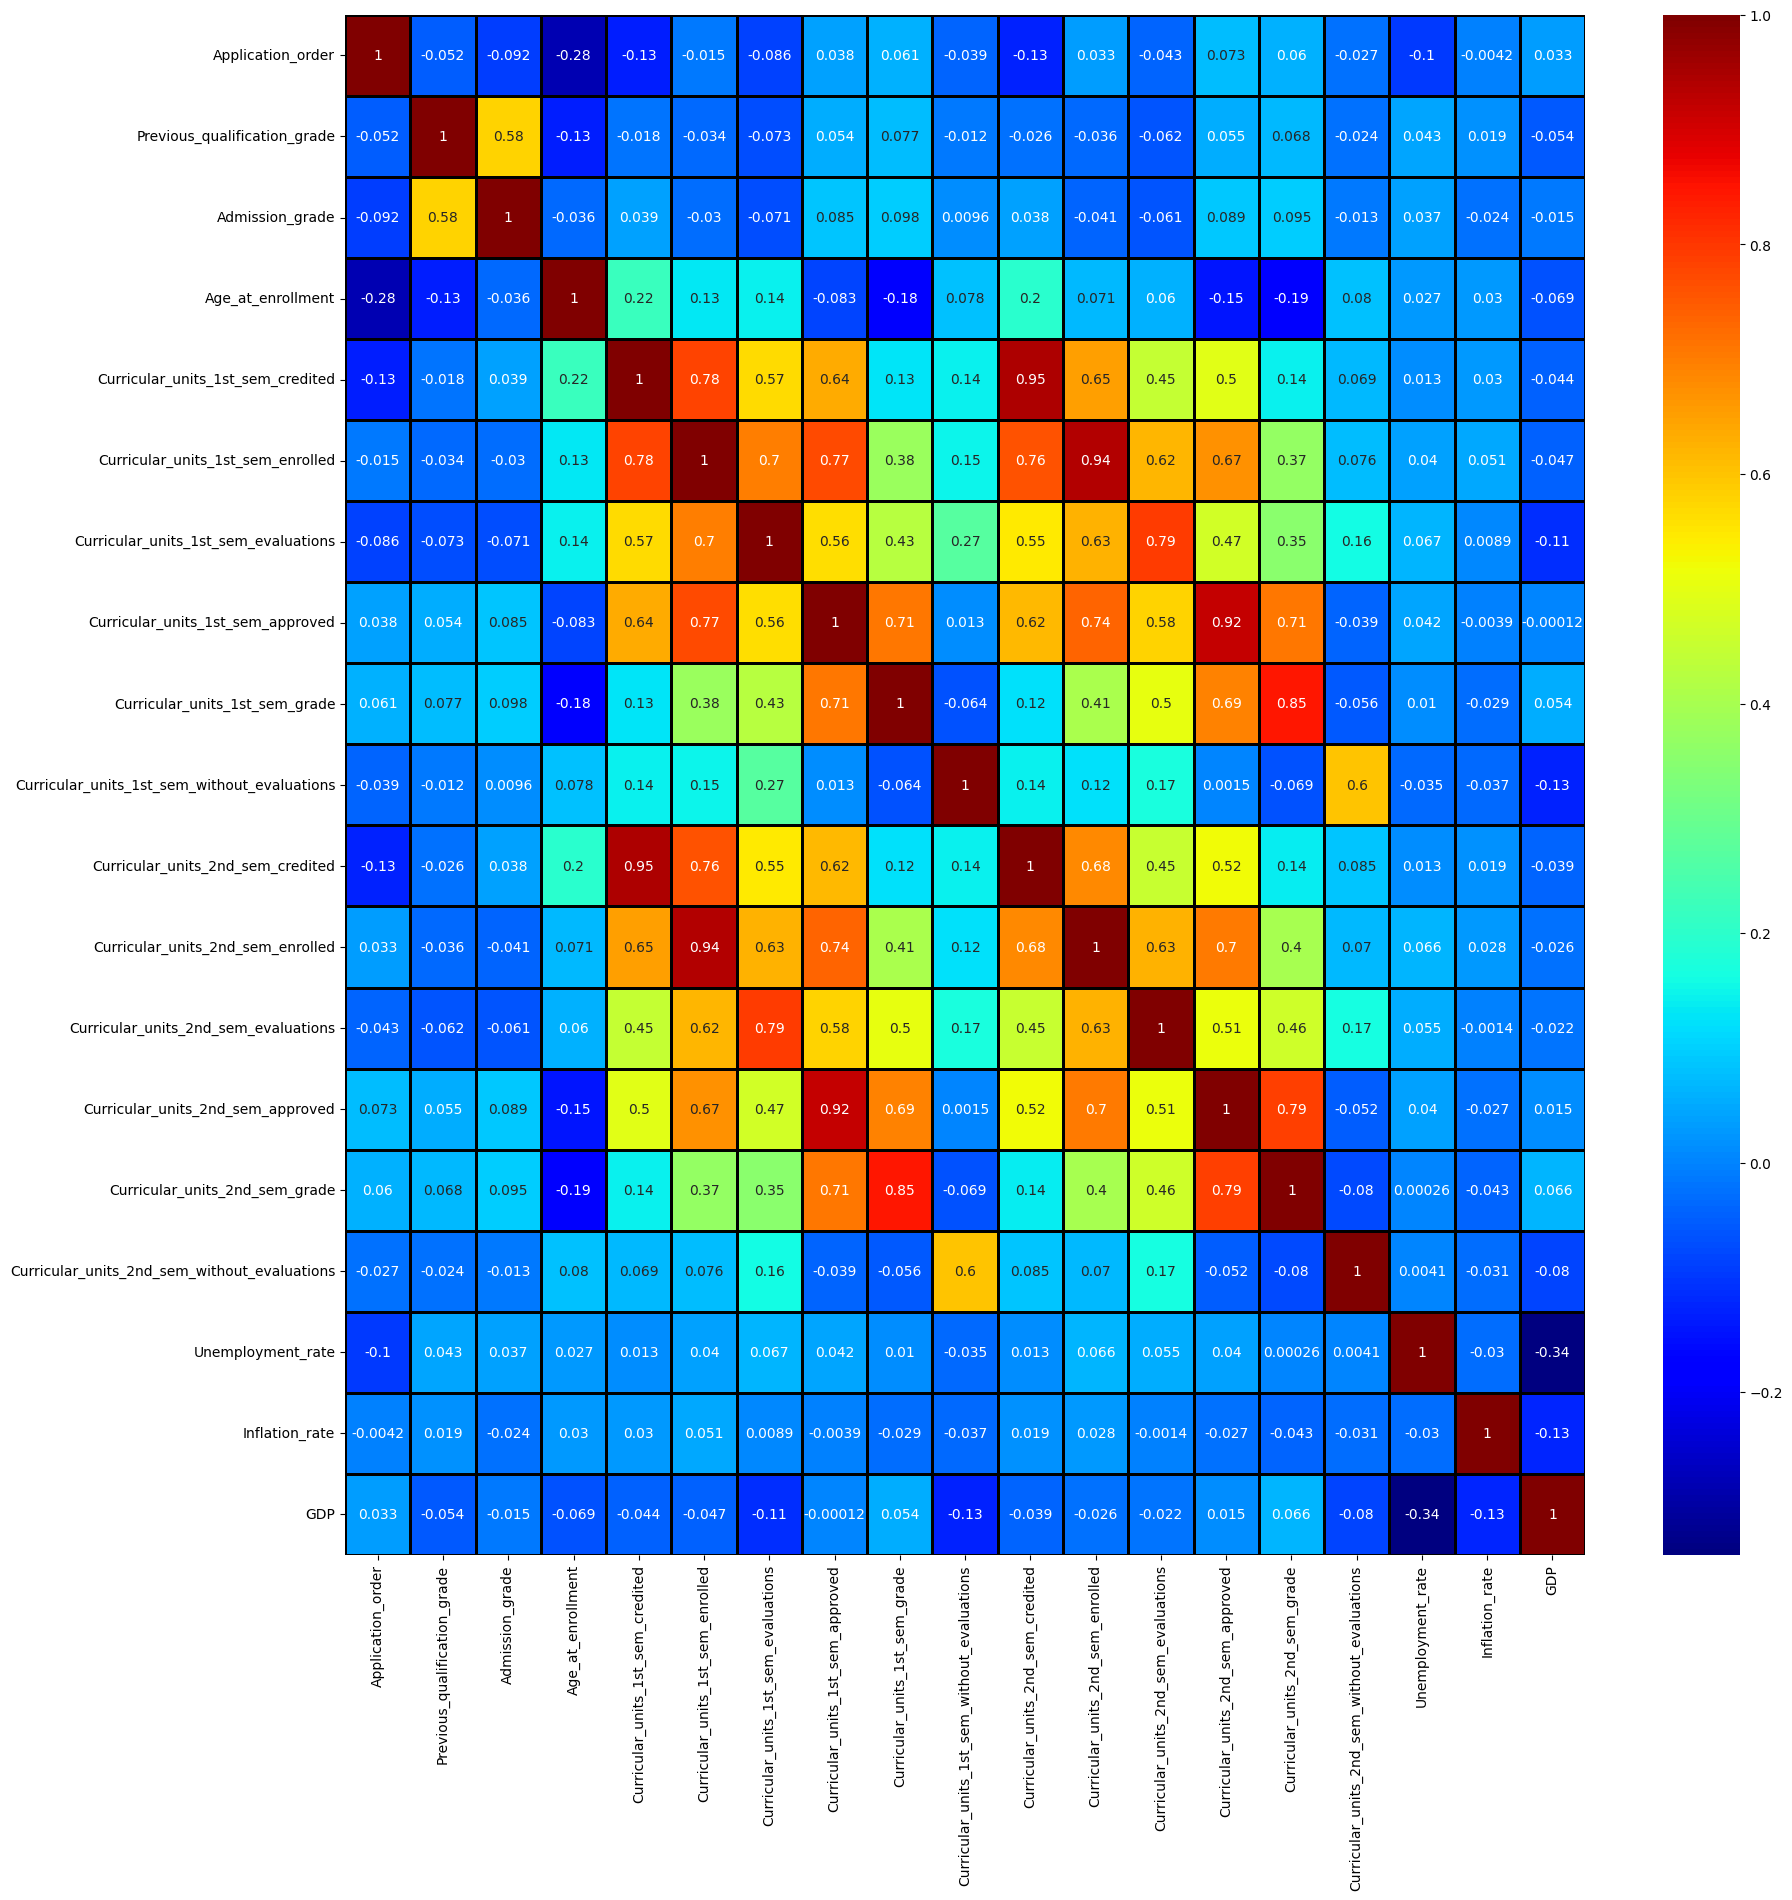

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

Dari plot map korelasi di atas kita dapat memperoleh beberapa info:

1. Fitur/kolom yang melibatkan Curricular_units banyak memiliki korelasi yang kuat baik di dalam satu semester yang sama atau pun apabila disandingkan dengan semester lain, sehingga berpotensi adanya multikorelanalitas

2. Previous qualification (grade) & Admission grade memiliki korelasi yang cukup tinggi sebesar 0.58.

3. Unemployment rate dan GDP memiliki korelasi negatif dengan nilai -0.34.

4. Curricular_units_1st_sem_without_evaluations hanya berkorelasi dengan Curricular_units_2nd_sem_without_evaluations sebesar 0.6

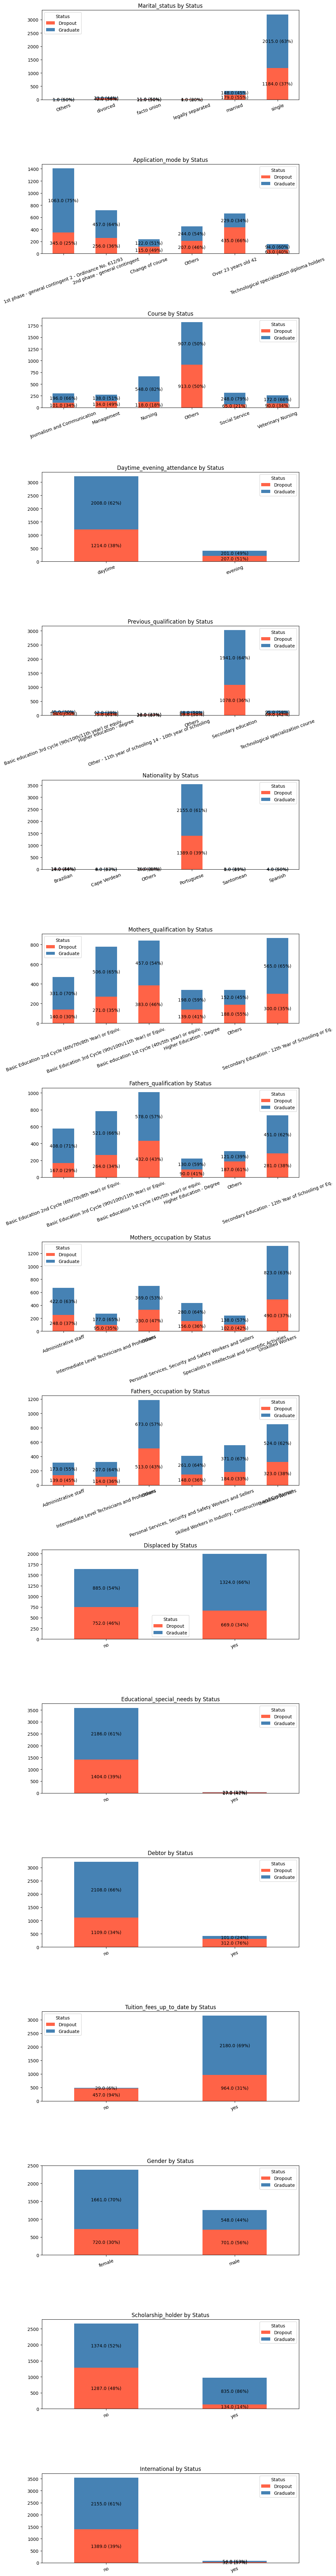

In [29]:
def stacked_barplot(features, df, segment_feature, dropout_colors):
    fig, ax = plt.subplots(len(features), 1, figsize=(10.5, 80))

    for i, feature in enumerate(features):
        # Get the top 5 categories by count
        top_5_categories = df[feature].value_counts().nlargest(5).index

        # Create a new column to replace less frequent categories with 'Others'
        df[feature + '_mod'] = df[feature].apply(lambda x: x if x in top_5_categories else 'Others')

        # Group by the modified feature and segment_feature
        counts_df = df.groupby([feature + '_mod', segment_feature]).size().unstack()
        percentages_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100

        # Plot the data
        counts_df.plot(kind='bar', stacked=True, ax=ax[i], color=[dropout_colors[col] for col in counts_df.columns])
        ax[i].set_title(f'{feature} by {segment_feature}')
        ax[i].set_ylabel('')
        ax[i].set_xlabel('')

        # Add annotations
        for p, percentages_ in zip(ax[i].patches, percentages_df.values.flatten('F')):
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            count = height 
            if not pd.isna(height):  # Only annotate non-NaN values
                ax[i].annotate(f'{count} ({percentages_:.0f}%)', (x + width / 2, y + height / 2),
                               ha='center', va='center', fontsize=10)

    for ax_ in ax:
        ax_.set_xticklabels(ax_.get_xticklabels(), rotation=20)

    plt.tight_layout()
    plt.show()

# Example usage
stacked_barplot(
    features=Categorical_columns,
    df=df,
    segment_feature='Status',
    dropout_colors=dropout_colors
)

Dari plot bar yang berjumlah 6 bar (5 kategori mahasiswa terbanyak + lainnnya) di atas didapat beberapa informasi:

1. Status perkawinan (marital status) dari sebagian besar mahasiswa hanya berada pada kategori single dan married, dengan kategori single sangat mendominasi dan mahasiswa married kurang dari 1/4 dari total mahasiswa single. Dropout rate terkecil ada pada kategori single, sedangkan kategori lainnya dengan total mahasiswa jauh lebih sedikit, memiliki dropout rate lebih dari 50%. Menandakan mahasiswa yang memiliki hubungan lebih rawan melakukan dropout. #

2. Dropout rate pada kelompok application mode memiliki rentang nilai 25-66% dan variasi yang cukup tinggi antar kategori dengan jumlah mahasiswa tertinggi. Jumlah mahasiswa pada kategori 1st phase - general contingent 2 memiliki nilai tertinggi, namun dropout rate pada kategori tersebut merupakan nilai yang terendah daripada kategori lainnya, yaitu sebesar 25%. Dropout rate tertinggi dengan nilai sebesar 66% terdapat pada kategori over 23 years old. ##

3. Pada pengelompokan berdasarkan course terdapat variasi tinggi baik dari segi jumlah maupun dropout rate masing-masing kategori. Kategori gabungan lainnya (Others) memiliki jumlah dan dropout tertinggi menandakan keberagaman yang tinggi pula, selain dari 5 kategori dengan total mahasiswa terbesar.###

4. Berdasarkan penegelompokan waktu kehadiran, jumlah mahasiswa siang hari (daytime) jauh lebih tinggi daripada mahasiswa malam hari (evening), dan dropout rate mahasiswa malam lebih tinggi 13% dari mahasiswa siang #

5. Kelompok previous qualification tidak memiliki informasi yang cukup berguna dikarenakan variasi nilai drop out rate yang cukup besar, tidak dibarengin oleh variasi kategorinya. Sebagian besar mahasiswa terkonsentrasi pada second grade dan kategori lainnya (termasuk others) bernilai sangat kecil.

6. Sama halnya dengan kelompok previous qualification, kelompok nationality juga sangat terkonsentrasi pada 1 kategori (portugis) dan tidak memiliki variasi nilai drop out rate pada beberapa kategorinya. Sehingga tidak memiliki informasi yang signifikan untuk mengetahui potensi dropout

7. Pada pengelompokan berdasarkan mothers qualification dan fathers qualification, jumlah mahasiswa untuk 6 kategori ini cukup bervariasi akan tetapi tidak memberi infromasi yang signifikan karena nilai dropout yang tidak jauh berbeda di masing-masing kategori.

8. Pada pengelompokan berdasarkan mothers occupation dan fathers occupation, juga tidak memberikan informasi yang cukup berguna dikarenakan variasi jumlah mahasiswa di tiap kategori tidak diikuti oleh variasi drop out ratenya.

9. Berdasarkan pengelompokan apakah mahasiswa terlantar atau tidak memiliki jumlah mahasiswa hampir sama, dengan nilai dropout rate yang hampir sama pula akan tetapi mahasiswa terlantar justru malah memiliki nilai dropout rate yang lebih rendah. Hal ini tentu ketidaksesuaian dengan asumsi dimana mahasiswa yang terlantar harusnya memiliki dropout rate lebih tinggi. Sehingga juga dapat diketahui bahwa Displaced bukan menjadi permasalahan yang menjadikan dropout bagi mahasiswa di institusi ini.

10. Berdasarkan pengelompokan Educational special needs, jumlah mahasiswa yang membutuhkan kebutuhan khusus sangat jauh sedikit dari yang tidak dan memiliki dropout rate cukup tinggi yakni 74%. Sehingga dapat dikatakan bahwa mahasiswa yang memiliki kebutuhan khusus cukup berpotensi melakukan dropout, meski jumlahnya sangat sedikit.

11. Berdasarkan pengelompokan berdasarkan apakah mahasiswa tersebut peminjam atau tidak, terdapat informasi yang sangat signifikan dimana mahasiswa ang berstatus peminjam memiliki dropout rate cukup tinggi (76%) dibandingkan mahaiswa yang tidak (34%). Jumlah mahasiswa peminjam juga memang cukup jauh lebih kecil dibanding yang tidak. ####

12. Tuition fees merupakan pengelompokan yang paling signifikan dalam mengetahui potensi dropout mahasiswa, dikarenakan mahasiswa yang memiliki biaya kuliah up to date hanya memiliki dropout rate 31%, sedangkan mahasiswa dengan biaya kuliah tidak up to date sebesar 94%. ####

13. Pada pengelompokan berdasarkan gender, jumlah mahasiswa perempuan lebih banyak daripada laki-laki. Namun, dropout rate pada kategori laki-laki lebih tinggi, yaitu sebesar 56% sedangkan wanita hanya 30%. Menunjukan adanya kecenderungan potensi dropout lebih pada laki-laki. #

14. Jumlah mahasiswa yang tidak memiliki beasiswa jauh lebih banyak daripada mahasiswa yang memiliki beasiswa. Dropout rate pada kategori tidak memiliki beasiswa juga lebih tinggi, yaitu sebesar 48% sedangkan yang memiliki beasiswa sangat kecil di 14%. Menunjukan penerima beasiswa akan sangat rendah potensinya melakukan dropout ####

15. Jumlah mahasiswa internasional memiliki nilai yang sangat jauh jika dibandingkan dengan mahasiswa non-internasional. Namun, dropout rate pada kedua kategori ini memiliki nilai yang tidak jauh berbeda, sehingga menunjukan bahwa permasalah dropout rate tidak ditentukan oleh jenis mahasiswa tersebut.

In [30]:
for i in Categorical_columns:
    df_droprate = df.replace({'Status': {'Dropout': 1, 'Graduate': 0}}).groupby(by=[i], as_index=False).agg({
    "Status": (lambda x: "{:.0%}".format(x.sum() / x.count())), #Dropout Rate (%)
    })
    print(df_droprate)
    print('========================================================================')

      Marital_status Status
0           divorced    56%
1        facto union    50%
2  legally separated    80%
3            married    55%
4             single    37%
5            widower    50%
                                     Application_mode Status
0   1st phase - general contingent 2 - Ordinance N...    25%
1      1st phase - special contingent (Azores Island)    67%
2     1st phase - special contingent (Madeira Island)    17%
3                      2nd phase - general contingent    36%
4                      3rd phase - general contingent    42%
5                                    Change of course    49%
6                        Change of institution/course    43%
7        Change of institution/course (International)     0%
8                     Holders of other higher courses    64%
9                    International student (bachelor)    25%
10  Ordinance No. 533-A/99, item b2) (Different Plan)   100%
11  Ordinance No. 533-A/99, item b3 (Other Institu...   100%
12  Ordinan

C:\Users\kocak\AppData\Local\Temp\ipykernel_21396\1581538027.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_droprate = df.replace({'Status': {'Dropout': 1, 'Graduate': 0}}).groupby(by=[i], as_index=False).agg({
C:\Users\kocak\AppData\Local\Temp\ipykernel_21396\1581538027.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_droprate = df.replace({'Status': {'Dropout': 1, 'Graduate': 0}}).groupby(by=[i], as_index=False).agg({
C:\Users\kocak\AppData\Local\Temp\ipykernel_21396\1581538027.py:2: FutureWarning: Downcasting beha

Berdasarkan berbagai infromasi terkait berbagai kolom kategorik di atas dapat disimpulkan sebagai berikut:

1. Beberapa kolom yang terlihat memiliki informasi yang cukup signifikan mengenai potensi dropout adalah kolom:
    - Marital_status
    - Application_mode (krusial)
    - Course 
    - Daytime_evening_attendance
    - Debtor (krusial)
    - Tuition_fees_up_to_date (krusial)
    - Gender
    - Scholarship_holder (krusial)

2. Beberapa kolom kategori yang tidak memberikan informasi yang signifikan, dapat dikarenakan mahasiswa yang terlalu berkumpul pada kategori tertentu saja (pengecualian untuk yang hanya memiliki 2 kategori) atau karena kurangnya variasi dropout rate antar kategorinya. Kolom tersebut bisa saja sudah memiliki persebaran jumlah mahasiswa di berbagai kategorinya, akan tetapi variasi dari dropout di kategori dengan jumlah mahasiswa terbanyak tidak signifikan. Begitupun sebaliknya, sebaran nilai dropout out rate di 5 kategori teratas sudah bervariasi, akan tetapi kebanyakan mahasiswanya sangat terkumpul di 1 kategori saja.

In [31]:
df[numerical_columns].describe(include="all")

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.750138,132.920606,127.293939,23.461157,0.754270,6.337466,8.071074,4.791460,10.534860,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,1.333831,13.238373,14.611295,7.827994,2.477277,2.570773,4.286632,3.237845,5.057694,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,118.000000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.500000,20.000000,0.000000,6.000000,8.000000,5.000000,12.341429,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,135.100000,25.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [32]:
def numerical_dis_box_plot(features, df, segment_feature=None, showfliers=True, hue_=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(12, 30))
    for i, feature in enumerate(features):
        if features:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers, hue=hue_)
            ax[i].set_title(f'{feature} by {segment_feature}')
            ax[i].set_xlabel('')
            ax[i].set_ylabel('')
            if hue_:
                ax[i].legend(loc='upper right')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

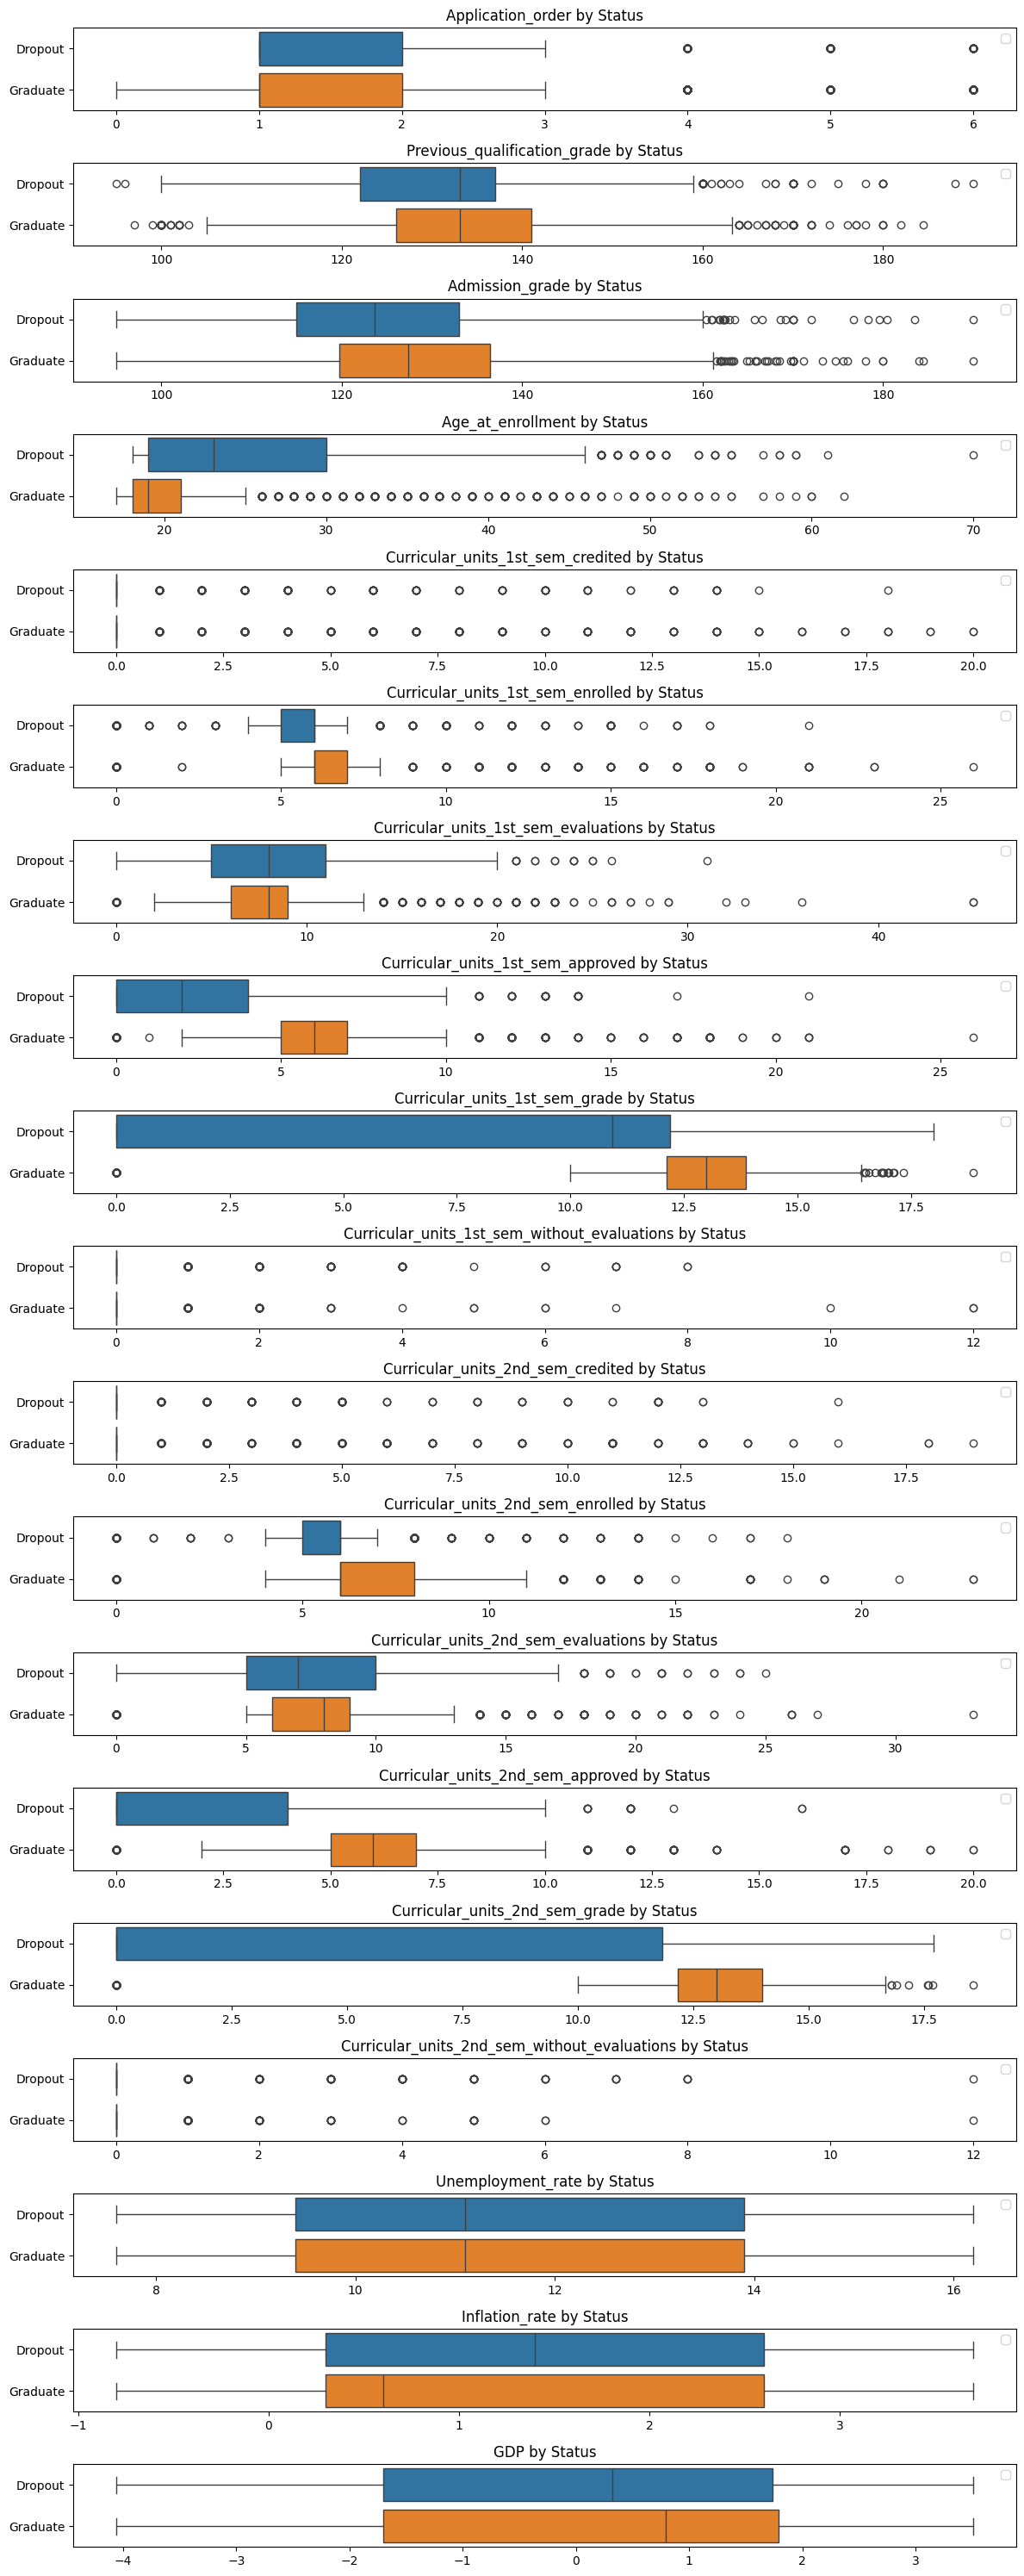

In [33]:
numerical_dis_box_plot(
    features=numerical_columns,
    df=df, 
    segment_feature=Label_column,
    hue_=Label_column,
)

Melalui boxplot kolom numerik di atas kita didapat beberapa informasi:

1. Application_order tidak memberi banyak perbedaan antara mahasiswa drop out dan graduate Kebanyakan mahasiswa memilih institutsi ini di urutan kedua atau ketiga. Akan tetapi mahasiswa dropout tidak ada yang memiliki institusi ini pada pilihan pertama. Menunjukan bahwa apabila memilih di pilihan pertama sudah pasti akan lulus -00

2. Previous_qualification_grade (nilai kualifikasi sebelumnya) menunjukan distribusi mahasiswa dropout memikili nilai yang lebih kecil dibandingkan mahasiswa graduate.

3. Sama dengan sebelumnya, admission grade(nilai penerimaan) juga menunjukan sebaran distribusi yang bernilai lebih kecil pada mahasiswa dropout.

4. Usia siswa pada saat pendaftaran menunjukan bahwa sebagian besar mahasiswa graduate hanya berada di kisaran umur belasan sampai 22 tahun, sedangkan distribusi umur sebagian besar mahasiswa dropout jauh lebih tinggi dari sekitaran belasan sampai 30 tahun.

5.  The number of curricular units credited by the student di semester pertama dan kedua, untuk kedua status mahasiswa memiliki kesamaan pola distribusi, dimana sebagian besarnya berada di nilai 0, meski dengan nilai yang beragam.

6. The number of curricular units enrolled by the student di semester pertama dan kedua, juga memiliki kemiripan distribusi di mana mahasiswa dropout memiliki distribusi dengan nilai lebih rendah dari pada mahasiswa graduate.

7. Untuk number of curricular units evaluated by the student di semester 1 dan 2,  menunjukan distribusi nilai yang cukup serupa untuk kedua status, akan tetapi distribusi kebanyakan mahasiswa dropout memiliki jangkauan nilai lebih lebar dibandingkan mahasiwa graduate. -00 

8. Untuk number of curricular units approved by the student di semester 1 dan 2, menunjukan perbandingan cukup kuat antara distibusi sebaran untuk kedua status mahasiswa. Mahasiswa dropout memiliki sebaran yang cukup jauh lebih rendah diabdning mahasiswa graduate. ###

9. Untuk grade di semester 1 dan 2, juga menunjukan perbedaan cukup signifikan dimana mahasiswa dropout terdistribusi kebanyakannya dari nilai 0 sampai sekitaran 12, sedangkan pada mahasiswa graduate nilainya sebagian besar di sekitaran 12-13 ##

10. Untuk number of curricular units not evaluated by the student di semester 1 dan 2, menunjukan tidak ada perbedaan sitribusi yang signifikan antara mahasiswa dropout dan graduate, dikarenakan keduanya sebagian besar berada pada nilai 0. -00

11. Untuk kolom unemployment rate, inflation rate, dan GDP, untuk mahasiswa dropout maupun graduate memiliki sebaran distribusi yang serupa, sehingga dirasa tidak memberikan informasi signifikan sebagai indikator potensi dropout rate



In [34]:
for i in numerical_columns:
    df_droprate = df.replace({'Status': {'Dropout': 1, 'Graduate': 0}}).groupby(by=[i], as_index=False).agg(
    Dropout_rate = ("Status", (lambda x: "{:.0%}".format(x.sum() / x.count()))))
    print(df_droprate)
    print('========================================================================')

C:\Users\kocak\AppData\Local\Temp\ipykernel_21396\396856809.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_droprate = df.replace({'Status': {'Dropout': 1, 'Graduate': 0}}).groupby(by=[i], as_index=False).agg(
C:\Users\kocak\AppData\Local\Temp\ipykernel_21396\396856809.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_droprate = df.replace({'Status': {'Dropout': 1, 'Graduate': 0}}).groupby(by=[i], as_index=False).agg(
C:\Users\kocak\AppData\Local\Temp\ipykernel_21396\396856809.py:2: FutureWarning: Downcasting behavior 

   Application_order Dropout_rate
0                  0           0%
1                  1          43%
2                  2          33%
3                  3          31%
4                  4          27%
5                  5          41%
6                  6          26%
     Previous_qualification_grade Dropout_rate
0                            95.0         100%
1                            96.0         100%
2                            97.0           0%
3                            99.0           0%
4                           100.0          47%
..                            ...          ...
96                          180.0          57%
97                          182.0           0%
98                          184.4           0%
99                          188.0         100%
100                         190.0         100%

[101 rows x 2 columns]
     Admission_grade Dropout_rate
0               95.0          70%
1               95.1         100%
2               95.5          50%
3   

C:\Users\kocak\AppData\Local\Temp\ipykernel_21396\396856809.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_droprate = df.replace({'Status': {'Dropout': 1, 'Graduate': 0}}).groupby(by=[i], as_index=False).agg(
C:\Users\kocak\AppData\Local\Temp\ipykernel_21396\396856809.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_droprate = df.replace({'Status': {'Dropout': 1, 'Graduate': 0}}).groupby(by=[i], as_index=False).agg(


Berdasarkan berbagai infromasi terkait berbagai kolom kategorik di atas dapat disimpulkan sebagai berikut:

1. Beberapa kolom yang terlihat memiliki informasi yang cukup signifikan dan memberi pembedaan mengenai dropout adalah kolom:
    - Previous_qualification_grade
    - Admission_grade
    - Age_at_enrollment
    - Curricular units 1st sem credited, enrolled, approved(krusial), grade(krusial)
    - Curricular units 2nd sem credited, enrolled, approved(krusial), grade(krusial)

2. Beberapa kolom numerik lainnya yang tidak memberikan informasi yang signifikan, dikarenakan mahasiswa yang terlalu berkumpul pada nilai tertentu saja atau karena kurangnya perbedaan persebaran distribusi nilai antar mahasiswa drop out dan graduate. 

## Data Preparation / Preprocessing

### Hanya menggunakan fitur yang memberi informasi signifikan

In [21]:
columns_used = ['Marital_status', 'Application_mode','Course','Daytime_evening_attendance',
                'Debtor','Tuition_fees_up_to_date','Gender','Scholarship_holder', 
                'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
                'Curricular_units_1st_sem_credited','Curricular_units_1st_sem_enrolled',
                'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                'Curricular_units_2nd_sem_credited','Curricular_units_2nd_sem_enrolled',
                'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
                'Status']

new_df = df[columns_used]
new_df

,Marital_status,Application_mode,Course,Daytime_evening_attendance,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
0,single,2nd phase - general contingent,Animation and Multimedia Design 8014,daytime,no,yes,male,no,122.0,127.3,20,0,0,0,0.000000,0,0,0,0.000000,Dropout
1,single,International student (bachelor),Tourism,daytime,no,no,male,no,160.0,142.5,19,0,6,6,14.000000,0,6,6,13.666667,Graduate
2,single,1st phase - general contingent 2 - Ordinance N...,Communication Design,daytime,no,no,male,no,122.0,124.8,19,0,6,0,0.000000,0,6,0,0.000000,Dropout
3,single,2nd phase - general contingent,Journalism and Communication,daytime,no,yes,female,no,122.0,119.6,20,0,6,6,13.428571,0,6,5,12.400000,Graduate
4,married,Over 23 years old 42,Social Service (evening attendance),evening,no,yes,female,no,100.0,141.5,45,0,6,5,12.333333,0,6,6,13.000000,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st phase - general contingent 2 - Ordinance N...,Journalism and Communication,daytime,no,yes,male,no,125.0,122.2,19,0,6,5,13.600000,0,6,5,12.666667,Graduate
4420,single,1st phase - general contingent 2 - Ordinance N...,Journalism and Communication,daytime,yes,no,female,no,120.0,119.0,18,0,6,6,12.000000,0,6,2,11.000000,Dropout
4421,single,1st phase - general contingent 2 - Ordinance N...,Nursing,daytime,no,yes,female,yes,154.0,149.5,30,0,7,7,14.912500,0,8,1,13.500000,Dropout
4422,single,1st phase - general contingent 2 - Ordinance N...,Management,daytime,no,yes,female,yes,180.0,153.8,20,0,5,5,13.800000,0,5,5,12.000000,Graduate


In [22]:
train_df, test_df = train_test_split(new_df, test_size=0.1, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(3267, 20)
(363, 20)


### Undersampling (untuk Train_df)

In [23]:
graduate_data = train_df[train_df['Status'] == 'Graduate']
dropout_data = train_df[train_df['Status'] == 'Dropout']

num_samples_action = len(dropout_data)
undersampled_graduate= graduate_data.sample(n=num_samples_action, replace=False, random_state=1337)
df_undersampled = pd.concat([undersampled_graduate, dropout_data])
df_undersampled = df_undersampled.sample(frac=1, random_state=1337).reset_index(drop=True)

print(df_undersampled['Status'].value_counts())

Status
Graduate    1274
Dropout     1274
Name: count, dtype: int64


In [24]:
df_undersampled.shape

(2548, 20)

### Split X and Y

In [25]:
X_train = df_undersampled.drop(columns="Status", axis=1)
y_train = df_undersampled["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

### Standarizing & OneHotEncoder

In [26]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df


def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = OneHotEncoder() #menggunakan one hot encoder dikarenakan kolom kategori yang tidak berurutan (bukan ordinal categorical)
            X = df[feature].values.reshape(-1, 1)
            encoder.fit(X)
            encoded_feature = encoder.transform(X).toarray()
            df = df.drop(columns=[feature])
            df = df.join(pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out([feature])))
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
            
            X_test = df_test[feature].values.reshape(-1, 1)
            encoded_feature_test = encoder.transform(X_test).toarray()
            df_test = df_test.drop(columns=[feature])
            df_test = df_test.join(pd.DataFrame(encoded_feature_test, columns=encoder.get_feature_names_out([feature])))
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = OneHotEncoder()
            X = df[feature].values.reshape(-1, 1)
            encoder.fit(X)
            encoded_feature = encoder.transform(X).toarray()
            df = df.drop(columns=[feature])
            df = df.join(pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out([feature])))
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [27]:
numerical_columns = ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
                'Curricular_units_1st_sem_credited','Curricular_units_1st_sem_enrolled',
                'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                'Curricular_units_2nd_sem_credited','Curricular_units_2nd_sem_enrolled',
                'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']

categorical_columns = ['Marital_status', 'Application_mode','Course','Daytime_evening_attendance',
                'Debtor','Tuition_fees_up_to_date','Gender','Scholarship_holder']

In [28]:
new_X_train, new_X_test = scaling(numerical_columns, X_train, X_test)

In [29]:
new_X_train, new_X_test = encoding(categorical_columns, new_X_train, new_X_test)

In [30]:
new_X_test

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Marital_status_divorced,Marital_status_facto union,Marital_status_legally separated,Marital_status_married,Marital_status_single,Marital_status_widower,Application_mode_1st phase - general contingent 2 - Ordinance No. 612/93,Application_mode_1st phase - special contingent (Azores Island),Application_mode_1st phase - special contingent (Madeira Island),Application_mode_2nd phase - general contingent,Application_mode_3rd phase - general contingent,Application_mode_Change of course,Application_mode_Change of institution/course,Application_mode_Holders of other higher courses,Application_mode_International student (bachelor),"Application_mode_Ordinance No. 533-A/99, item b2) (Different Plan)","Application_mode_Ordinance No. 533-A/99, item b3 (Other Institution)",Application_mode_Ordinance No. 854-B/99 15 - International student (bachelor),Application_mode_Over 23 years old 42,Application_mode_Short cycle diploma holders,Application_mode_Technological specialization diploma holders,Application_mode_Transfer 43,Application_mode_widower,Course_Advertising and Marketing Management,Course_Agronomy,Course_Animation and Multimedia Design 8014,Course_Basic Education,Course_Biofuel Production Technologies,Course_Communication Design,Course_Equinculture,Course_Informatics Engineering,Course_Journalism and Communication,Course_Management,Course_Management (evening attendance),Course_Nursing,Course_Oral Hygiene,Course_Social Service,Course_Social Service (evening attendance),Course_Tourism,Course_Veterinary Nursing,Daytime_evening_attendance_daytime,Daytime_evening_attendance_evening,Debtor_no,Debtor_yes,Tuition_fees_up_to_date_no,Tuition_fees_up_to_date_yes,Gender_female,Gender_male,Scholarship_holder_no,Scholarship_holder_yes
0,0.234043,0.286316,0.037736,0.0,0.192308,0.115385,0.565121,0.000000,0.217391,0.20,0.578629,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.361702,0.287368,0.018868,0.0,0.230769,0.230769,0.749290,0.000000,0.260870,0.25,0.677419,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.893617,0.931579,0.018868,0.0,0.269231,0.153846,0.635762,0.000000,0.347826,0.00,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.329787,0.578947,0.037736,0.0,0.269231,0.192308,0.733775,0.000000,0.347826,0.35,0.688306,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.148936,0.157895,0.339623,0.0,0.230769,0.000000,0.000000,0.000000,0.260870,0.00,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.255319,0.263158,0.094340,0.0,0.230769,0.230769,0.688742,0.000000,0.260870,0.30,0.771505,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.

Label Encoding

In [31]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

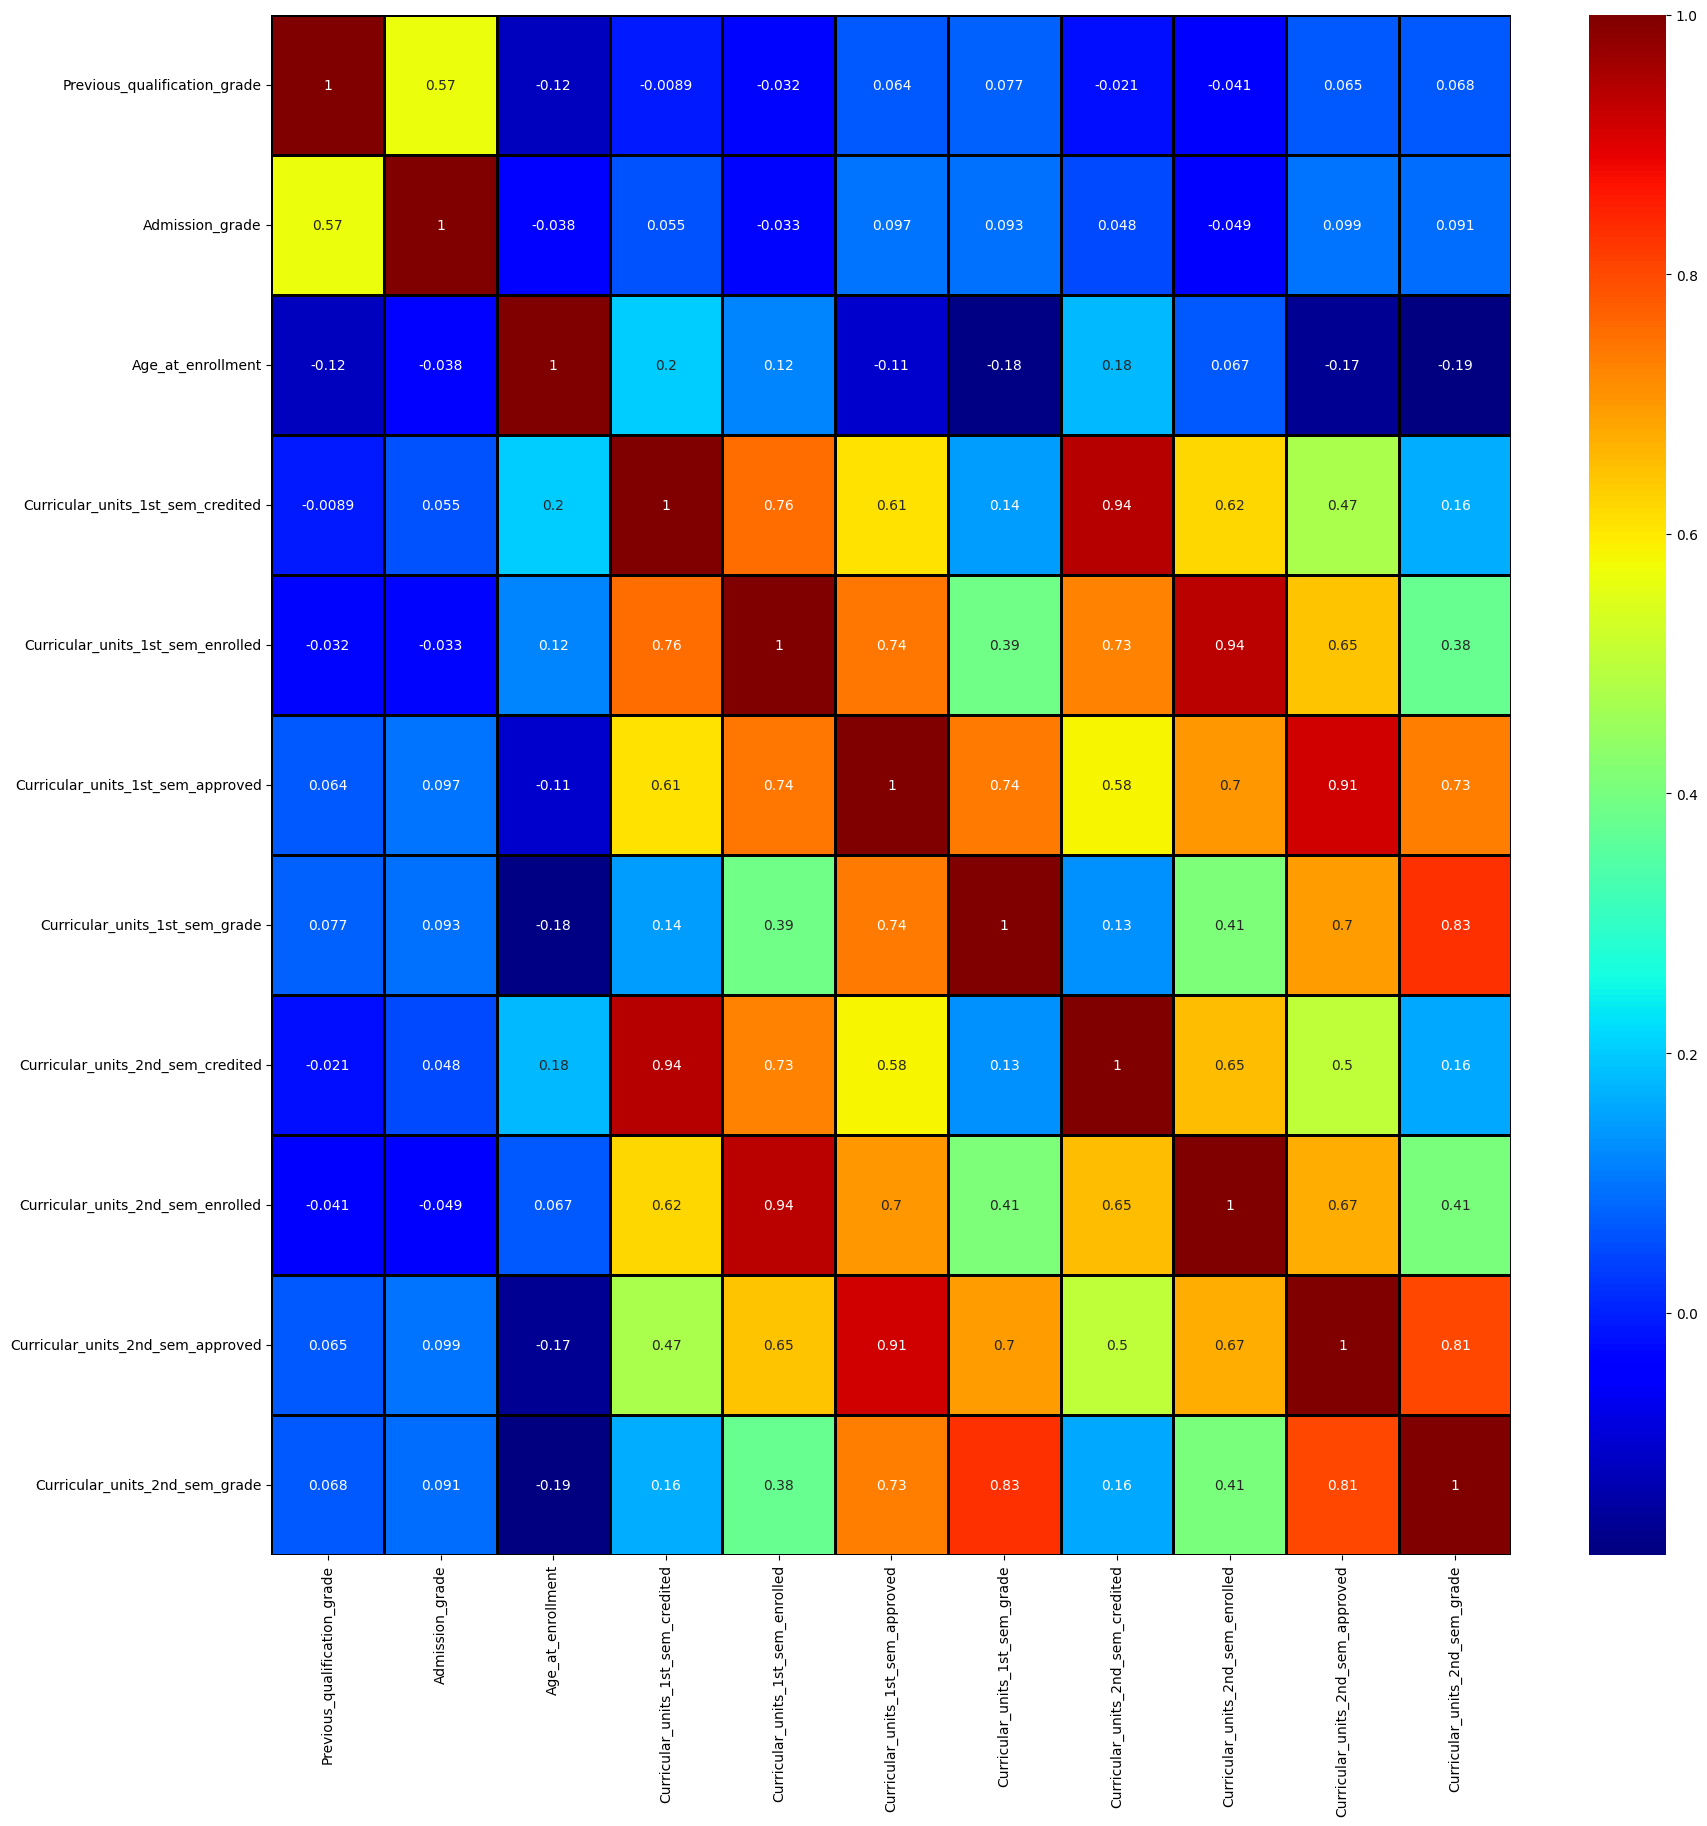

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(new_X_train[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

### PCA

In [32]:
pca_numerical_columns_1 = ['Curricular_units_1st_sem_credited','Curricular_units_1st_sem_enrolled',
                'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                'Curricular_units_2nd_sem_credited','Curricular_units_2nd_sem_enrolled',
                'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'
]

In [33]:
train_pca_df = new_X_train.copy().reset_index(drop=True)
test_pca_df = new_X_test.copy().reset_index(drop=True)

Mengetahui jumlah PCA yang optimal (menggunakan train set)

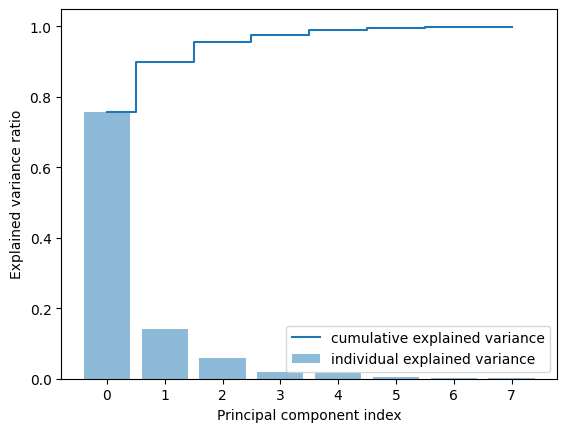

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

Melakukan fit dan transformasi data menjadi PCA untuk train set

In [35]:
pca_1 = PCA(n_components=3, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1]) #fitting
joblib.dump(pca_1, "model/pca_{}.joblib".format(1)) #saving
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1]) #transforming
train_pca_df[["pc1_1", "pc1_2", "pc1_3"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3"]) #new columns
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True) #drop
train_pca_df.head()

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Marital_status_divorced,Marital_status_facto union,Marital_status_legally separated,Marital_status_married,Marital_status_single,Marital_status_widower,Application_mode_1st phase - general contingent 2 - Ordinance No. 612/93,Application_mode_1st phase - special contingent (Azores Island),Application_mode_1st phase - special contingent (Madeira Island),Application_mode_2nd phase - general contingent,Application_mode_3rd phase - general contingent,Application_mode_Change of course,Application_mode_Change of institution/course,Application_mode_Holders of other higher courses,Application_mode_International student (bachelor),"Application_mode_Ordinance No. 533-A/99, item b2) (Different Plan)","Application_mode_Ordinance No. 533-A/99, item b3 (Other Institution)",Application_mode_Ordinance No. 854-B/99 15 - International student (bachelor),Application_mode_Over 23 years old 42,Application_mode_Short cycle diploma holders,Application_mode_Technological specialization diploma holders,Application_mode_Transfer 43,Application_mode_widower,Course_Advertising and Marketing Management,Course_Agronomy,Course_Animation and Multimedia Design 8014,Course_Basic Education,Course_Biofuel Production Technologies,Course_Communication Design,Course_Equinculture,Course_Informatics Engineering,Course_Journalism and Communication,Course_Management,Course_Management (evening attendance),Course_Nursing,Course_Oral Hygiene,Course_Social Service,Course_Social Service (evening attendance),Course_Tourism,Course_Veterinary Nursing,Daytime_evening_attendance_daytime,Daytime_evening_attendance_evening,Debtor_no,Debtor_yes,Tuition_fees_up_to_date_no,Tuition_fees_up_to_date_yes,Gender_female,Gender_male,Scholarship_holder_no,Scholarship_holder_yes,pc1_1,pc1_2,pc1_3
0,0.680851,0.222105,0.169811,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.421549,-0.128646,-0.019859
1,0.244681,0.245263,0.037736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.390524,0.006562,0.405748
2,0.468085,0.292632,0.037736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.304096,0.012543,-0.026693
3,0.468085,0.105263,0.358491,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.235496,-0.049563,-0.014159
4,0.489362,0.347368,0.037736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.759126,0.146413,-0.049516


Melakukan transformasi data menjadi PCA untuk test set

In [36]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
test_pca_df.head()

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Marital_status_divorced,Marital_status_facto union,Marital_status_legally separated,Marital_status_married,Marital_status_single,Marital_status_widower,Application_mode_1st phase - general contingent 2 - Ordinance No. 612/93,Application_mode_1st phase - special contingent (Azores Island),Application_mode_1st phase - special contingent (Madeira Island),Application_mode_2nd phase - general contingent,Application_mode_3rd phase - general contingent,Application_mode_Change of course,Application_mode_Change of institution/course,Application_mode_Holders of other higher courses,Application_mode_International student (bachelor),"Application_mode_Ordinance No. 533-A/99, item b2) (Different Plan)","Application_mode_Ordinance No. 533-A/99, item b3 (Other Institution)",Application_mode_Ordinance No. 854-B/99 15 - International student (bachelor),Application_mode_Over 23 years old 42,Application_mode_Short cycle diploma holders,Application_mode_Technological specialization diploma holders,Application_mode_Transfer 43,Application_mode_widower,Course_Advertising and Marketing Management,Course_Agronomy,Course_Animation and Multimedia Design 8014,Course_Basic Education,Course_Biofuel Production Technologies,Course_Communication Design,Course_Equinculture,Course_Informatics Engineering,Course_Journalism and Communication,Course_Management,Course_Management (evening attendance),Course_Nursing,Course_Oral Hygiene,Course_Social Service,Course_Social Service (evening attendance),Course_Tourism,Course_Veterinary Nursing,Daytime_evening_attendance_daytime,Daytime_evening_attendance_evening,Debtor_no,Debtor_yes,Tuition_fees_up_to_date_no,Tuition_fees_up_to_date_yes,Gender_female,Gender_male,Scholarship_holder_no,Scholarship_holder_yes,pc1_1,pc1_2,pc1_3
0,0.234043,0.286316,0.037736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.035283,-0.101301,-0.015077
1,0.361702,0.287368,0.018868,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.262110,-0.093517,0.069342
2,0.893617,0.931579,0.018868,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-0.353396,0.039472,0.444799
3,0.329787,0.578947,0.037736,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.296158,-0.033351,0.038097
4,0.148936,0.157895,0.339623,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.773139,0.104182,-0.058310


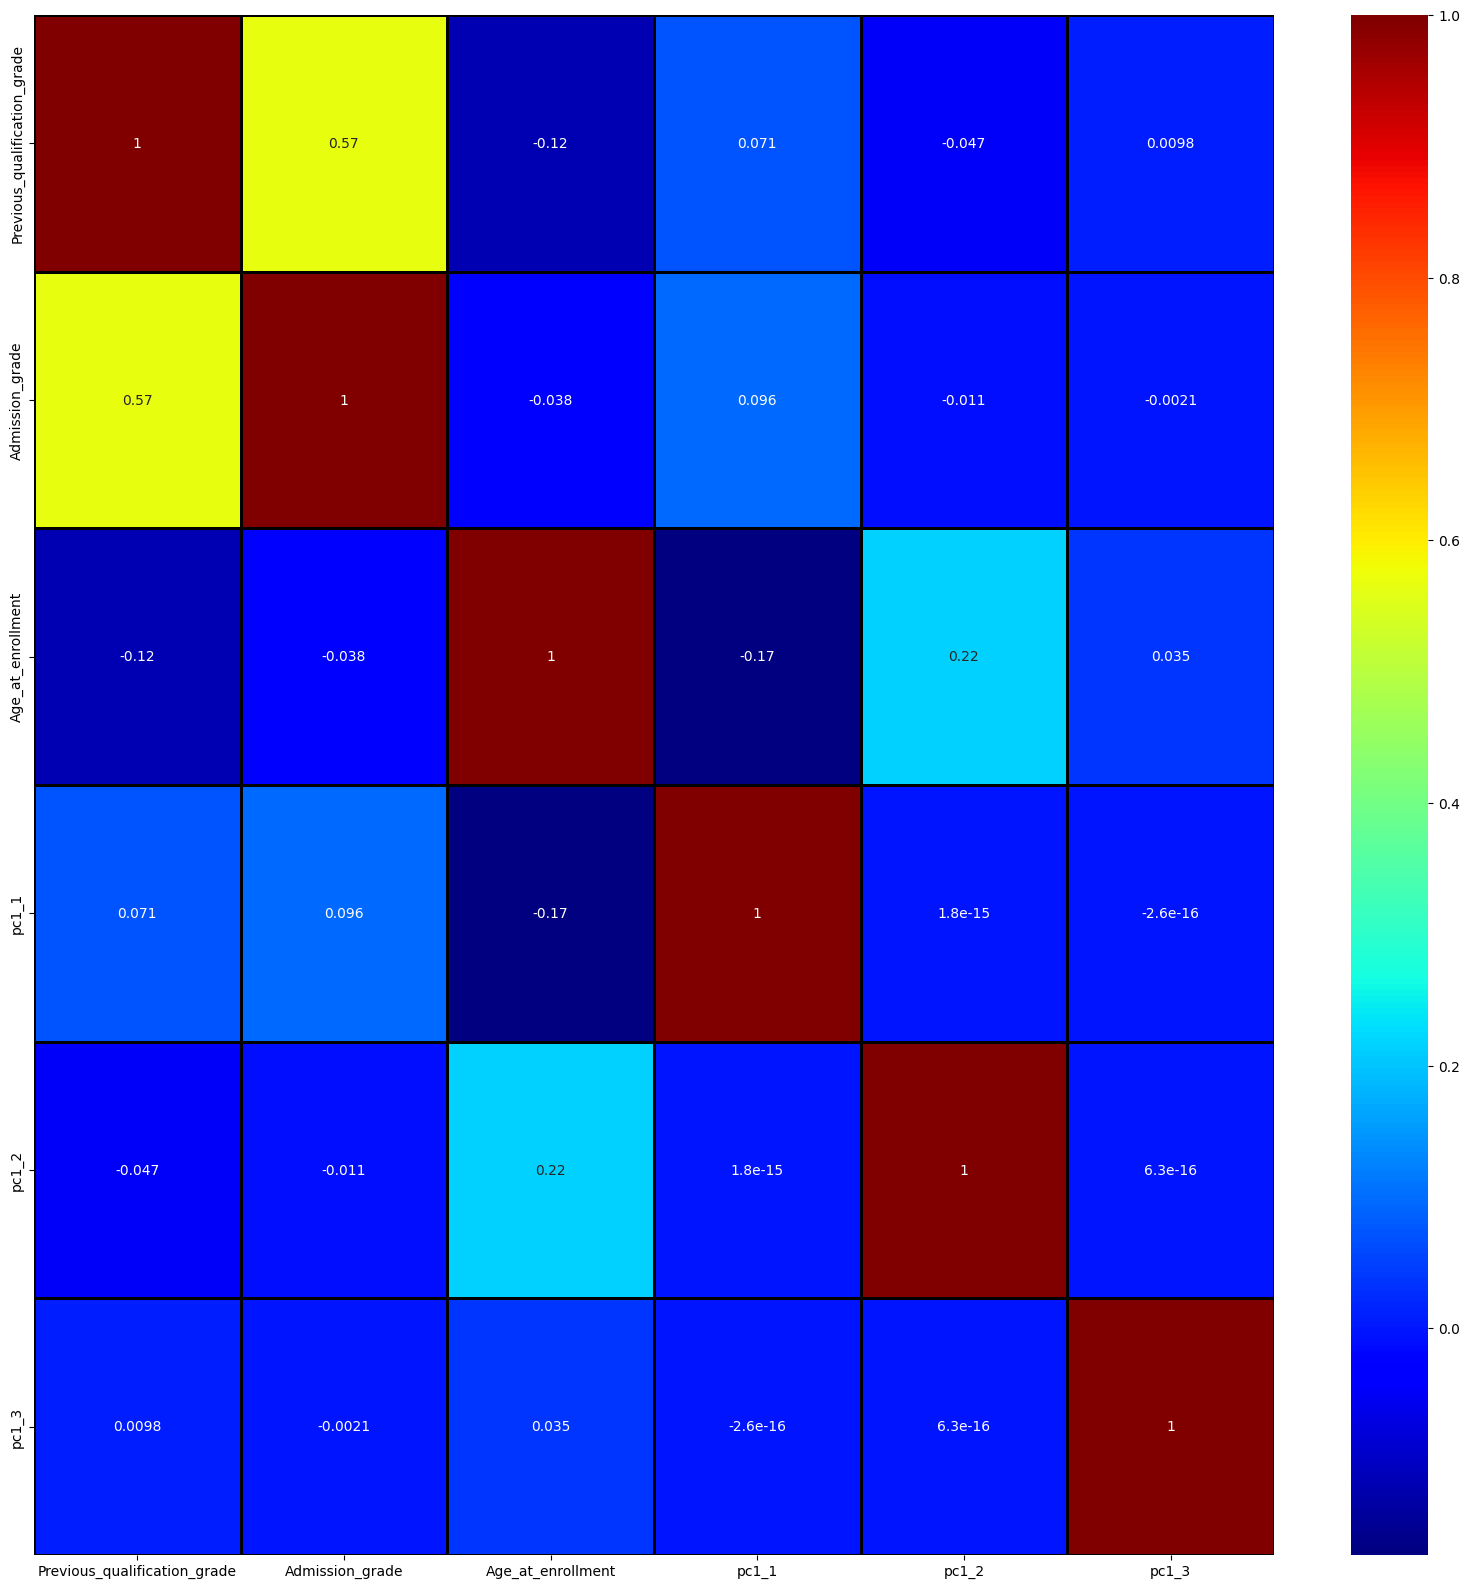

In [37]:
numerical_columns = ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment',
                    'pc1_1', 'pc1_2', 'pc1_3']

plt.figure(figsize=(20,20))
sns.heatmap(train_pca_df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

## Modeling

### Logistic Regression

In [53]:
log_model = LogisticRegression(random_state=123)

param_grid = {
    "penalty": ["l1","l2", "elasticnet"],
    "C": [0.001, 0.01, 0.1, 1]
}

CV_log = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_log.fit(train_pca_df, new_y_train)
print("best parameters: ", CV_log.best_params_)
print("accuracy : ", CV_log.best_score_)

best parameters:  {'C': 1, 'penalty': 'l2'}
accuracy :  0.8685203590276975


c:\Users\kocak\anaconda3\envs\credit_scoring\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kocak\anaconda3\envs\credit_scoring\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kocak\anaconda3\envs\credit_scoring\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\kocak\anaconda3\envs\credit_scoring\lib\site-packages\sklearn\l

In [41]:
log_model = LogisticRegression(random_state=123, C=1, penalty='l2', max_iter=1000)
log_model.fit(train_pca_df, new_y_train)
joblib.dump(log_model, "model/log_model.joblib")

['model/log_model.joblib']

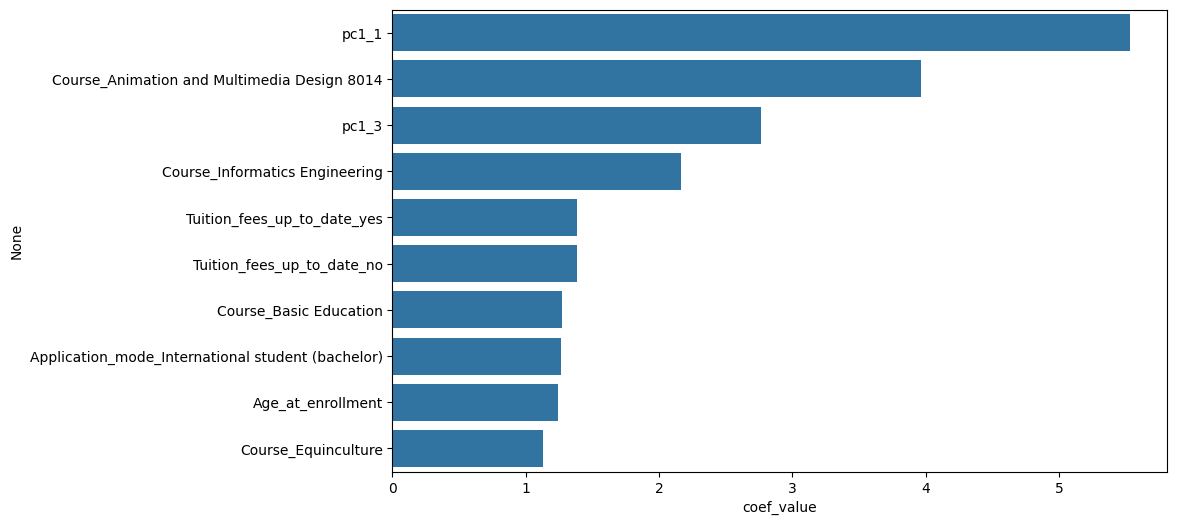

,coef_value
pc1_1,5.536178
Course_Animation and Multimedia Design 8014,3.962694
pc1_3,2.765465
Course_Informatics Engineering,2.162302
Tuition_fees_up_to_date_yes,1.383150
Tuition_fees_up_to_date_no,1.382425
Course_Basic Education,1.270947
Application_mode_International student (bachelor),1.263805
Age_at_enrollment,1.240911
Course_Equinculture,1.127433


In [83]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features
    features = features.head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features.head(15)

plot_feature_importances(np.mean(np.abs(log_model.coef_), axis=0), train_pca_df.columns)

### Random Forest

In [71]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = { 
    'n_estimators': [200, 500, 700, 800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7, 11, 13, 15],
    'criterion' :['gini', 'entropy', 'log_loss']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

print("best parameters: ", CV_rdf.best_params_)
print("accuracy : ", CV_rdf.best_score_)

c:\Users\kocak\anaconda3\envs\credit_scoring\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


best parameters:  {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 500}
accuracy :  0.8814715512924227


In [38]:
rdf_model = RandomForestClassifier(
    random_state=123, 
    max_depth=11, 
    n_estimators=500, 
    max_features='auto', 
    criterion='gini', 
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

c:\Users\kocak\anaconda3\envs\credit_scoring\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


['model/rdf_model.joblib']

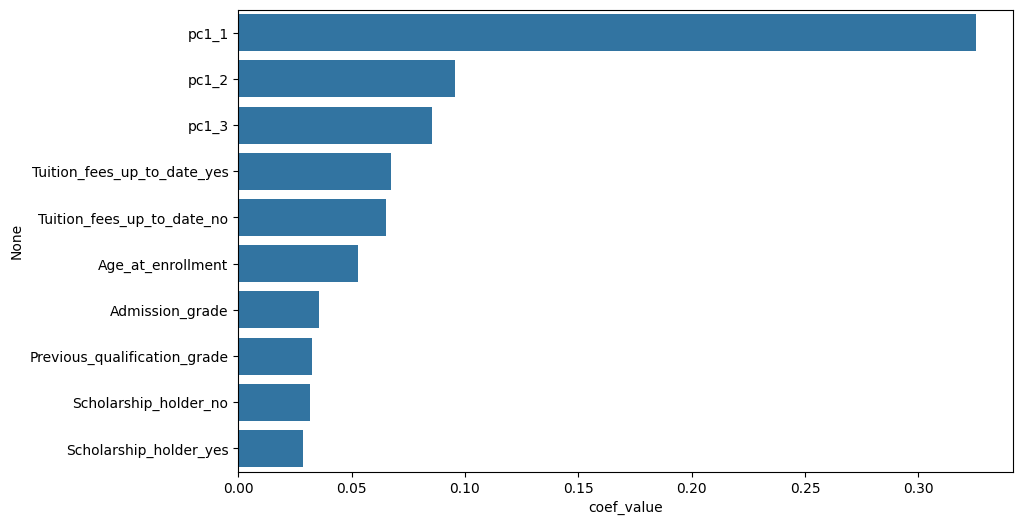

,coef_value
pc1_1,0.325565
pc1_2,0.095697
pc1_3,0.085305
Tuition_fees_up_to_date_yes,0.067487
Tuition_fees_up_to_date_no,0.065310
Age_at_enrollment,0.052673
Admission_grade,0.035805
Previous_qualification_grade,0.032611
Scholarship_holder_no,0.031446
Scholarship_holder_yes,0.028472


In [84]:
plot_feature_importances(rdf_model.feature_importances_, train_pca_df.columns)

### Gradient Boosting

In [74]:
gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'max_depth': [5,9,11,13],
    'n_estimators': [200,400,500],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [5, 9, 11, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 500]})

In [76]:
print("best parameters: ", CV_gboost.best_params_)
print("accuracy : ", CV_gboost.best_score_)

best parameters:  {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}
accuracy :  0.8854008243769019


In [40]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    loss= 'exponential',
    learning_rate=0.1, 
    max_depth=5, 
    max_features= 'log2',
    n_estimators=200
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

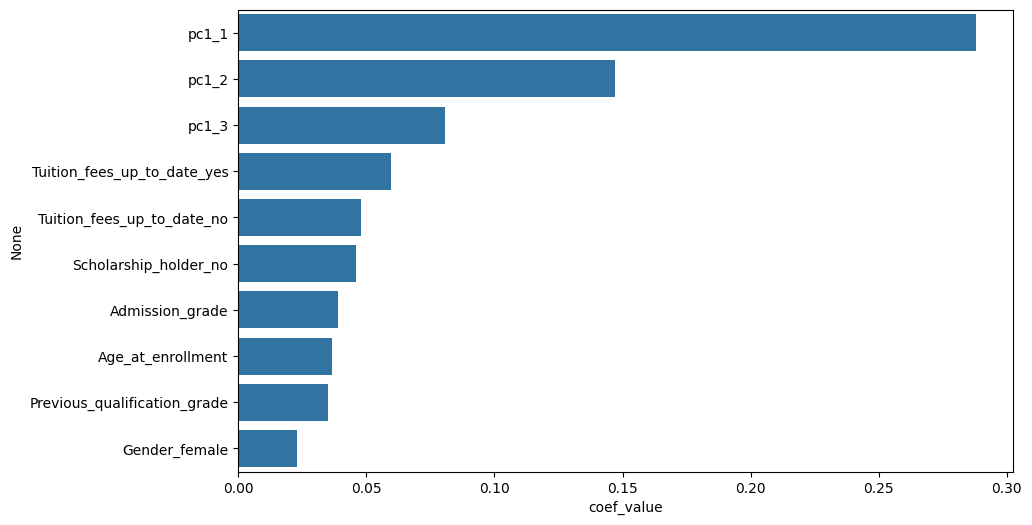

,coef_value
pc1_1,0.288120
pc1_2,0.147242
pc1_3,0.080834
Tuition_fees_up_to_date_yes,0.059803
Tuition_fees_up_to_date_no,0.047922
Scholarship_holder_no,0.046030
Admission_grade,0.038932
Age_at_enrollment,0.036570
Previous_qualification_grade,0.035103
Gender_female,0.022792


In [85]:
plot_feature_importances(gboost_model.feature_importances_, train_pca_df.columns)

## Evaluation

In [42]:
print('=========================================================================')
print('Logistic Regression Model\n')
y_pred = log_model.predict(test_pca_df)

accuracy = accuracy_score(new_y_test, y_pred)
report = classification_report(new_y_test, y_pred)
confusion = confusion_matrix(new_y_test, y_pred)

print(f"Confusion Matrix:\n{confusion}")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

print('=========================================================================')
print('Random Forest Model\n')
y_pred = rdf_model.predict(test_pca_df)

accuracy = accuracy_score(new_y_test, y_pred)
report = classification_report(new_y_test, y_pred)
confusion = confusion_matrix(new_y_test, y_pred)

print(f"Confusion Matrix:\n{confusion}")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

print('=========================================================================')
print('Gradient Boosting Model\n')
y_pred = gboost_model.predict(test_pca_df)

accuracy = accuracy_score(new_y_test, y_pred)
report = classification_report(new_y_test, y_pred)
confusion = confusion_matrix(new_y_test, y_pred)

print(f"Confusion Matrix:\n{confusion}")
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')



Logistic Regression Model

Confusion Matrix:
[[116  31]
 [ 18 198]]
Accuracy: 0.8650137741046832
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       147
           1       0.86      0.92      0.89       216

    accuracy                           0.87       363
   macro avg       0.87      0.85      0.86       363
weighted avg       0.87      0.87      0.86       363

Random Forest Model

Confusion Matrix:
[[115  32]
 [ 14 202]]
Accuracy: 0.8732782369146006
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       147
           1       0.86      0.94      0.90       216

    accuracy                           0.87       363
   macro avg       0.88      0.86      0.87       363
weighted avg       0.87      0.87      0.87       363

Gradient Boosting Model

Confusion Matrix:
[[115  32]
 [ 17 199]]
Accuracy: 0.8650137741046832
Classification Re

Berdasarkan hasil evaluasi di atas, dapat disimpulkan bahwa ketiga model cukup baik dalam memprediksi status mahasiswa. Akan tetapi model terbaik yang akan dipilih di antara ketiga model adalah model Random Forest dikarenakan:
- Model random forest memiliki akurasi tertinggi diantara ketiganya
- Memiliki presisi tertinggi untuk kelas 0 (status dropout)
- Meski nilai recall untuk kelas 0 sedikit kurang dari logistic regression, akan tetapi untuk kelas 1 (graduate) recallnya tertinggi di antara yang lain. Menunjukan model dapat mengidentifikasi mahasiswa status graduate dengan sangat baik.

### Menyimpan nama fitur

In [45]:
train_pca_df.shape

(2548, 56)

In [46]:
train_pca_df.columns

Index(['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Marital_status_divorced', 'Marital_status_facto union', 'Marital_status_legally separated', 'Marital_status_married', 'Marital_status_single', 'Marital_status_widower', 'Application_mode_1st phase - general contingent 2 - Ordinance No. 612/93', 'Application_mode_1st phase - special contingent (Azores Island)', 'Application_mode_1st phase - special contingent (Madeira Island)', 'Application_mode_2nd phase - general contingent', 'Application_mode_3rd phase - general contingent', 'Application_mode_Change of course', 'Application_mode_Change of institution/course', 'Application_mode_Holders of other higher courses', 'Application_mode_International student (bachelor)', 'Application_mode_Ordinance No. 533-A/99, item b2) (Different Plan)', 'Application_mode_Ordinance No. 533-A/99, item b3 (Other Institution)', 'Application_mode_Ordinance No. 854-B/99 15 - International student (bachelor)',
       'Application_mode

In [43]:
feature_names = train_pca_df.columns
joblib.dump(feature_names, "model/feature_names.joblib")

['model/feature_names.joblib']